In [3]:
import torch

checkpoint = torch.load("checkpoints/stock_60_24_ns_Transformer_custom_ftMS_sl60_ll30_pl24_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_h64_l3_0/checkpoint.pth")
print(checkpoint)


OrderedDict({'enc_embedding.value_embedding.tokenConv.weight': tensor([[[ 0.0483, -0.3295,  0.1057],
         [-0.2277, -0.1881, -0.2030],
         [ 0.0537, -0.0745, -0.2134],
         ...,
         [-0.3274,  0.0065, -0.1106],
         [-0.1154,  0.1759, -0.1063],
         [-0.2636, -0.3678, -0.2280]],

        [[-0.2348, -0.1964,  0.3720],
         [ 0.1455,  0.1008, -0.0789],
         [ 0.1064, -0.3016,  0.3186],
         ...,
         [ 0.3869,  0.5177,  0.0513],
         [ 0.2019,  0.0761,  0.2563],
         [-0.0351,  0.2607,  0.0863]],

        [[ 0.0259, -0.1674,  0.2436],
         [-0.2131, -0.0703,  0.1798],
         [ 0.0194, -0.1790, -0.0689],
         ...,
         [ 0.4175,  0.0892, -0.0044],
         [-0.1219,  0.1339, -0.0960],
         [-0.1618,  0.5251, -0.0359]],

        ...,

        [[ 0.1141,  0.1974, -0.0467],
         [ 0.1341,  0.0355, -0.0905],
         [-0.0584,  0.3290, -0.0586],
         ...,
         [-0.0104,  0.1533,  0.1651],
         [-0.3407, -0.131

In [ ]:
import argparse

parser = argparse.ArgumentParser(description="Non-stationary Transformers for Time Series Forecasting")

import argparse

# Création manuelle du Namespace
args = argparse.Namespace(
    is_training=1,
    root_path="./dataset/stock_var/",
    data_path="stock.csv",
    model_id="stock_60_24",
    model="ns_Transformer",
    data="custom",
    features="MS",
    seq_len=60,
    label_len=30,
    pred_len=24,
    e_layers=3,
    d_layers=2,
    factor=3,
    enc_in=22,
    dec_in=22,
    c_out=22,
    gpu=0,
    des="Exp_h64_l3",
    p_hidden_dims=[32, 32],  # Liste
    p_hidden_layers=2,
    train_epochs=30,
    learning_rate=0.02,
    patience=10,
    itr=1,
    output_attention=True,
    d_model=
)

# Vérification des arguments
print(args)



Namespace(is_training=1, root_path='./dataset/stock_var/', data_path='stock.csv', model_id='stock_60_24', model='ns_Transformer', data='custom', features='MS', seq_len=60, label_len=30, pred_len=24, e_layers=3, d_layers=2, factor=3, enc_in=22, dec_in=22, c_out=22, gpu=0, des='Exp_h64_l3', p_hidden_dims=[32, 32], p_hidden_layers=2, train_epochs=30, learning_rate=0.02, patience=10, itr=1, output_attention=True)


In [14]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from ns_models.ns_Transformer import Model

model = Model(args)

model.load_state_dict(checkpoint)

weights = []
for name, param in model.named_parameters():
    if param.requires_grad:
        weights.append(param.data.cpu().numpy().flatten())  # Transformer en 1D

import numpy as np
weights = np.concatenate(weights)  # Concaténer tous les poids en une seule liste

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(weights, bins=100, alpha=0.75)
plt.xlabel("Valeurs des poids")
plt.ylabel("Fréquence")
plt.title("Distribution des poids du modèle")
plt.grid(True)
plt.show()


AttributeError: 'Namespace' object has no attribute 'd_model'

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les résultats
folder_path = "results/stock_36_24_ns_Transformer_custom_ftMS_sl36_ll18_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_h32_l2_0/"

true_values = np.load(folder_path + "true.npy")
predictions = np.load(folder_path + "pred.npy")
metrics = np.load(folder_path + "metrics.npy")
print(metrics)
name = np.array(["mae", "mse", "rmse", "mape", "mspe"])


[  0.66371554   2.3100357    1.5198802    3.177915   354.36627   ]


In [15]:
print(predictions)

[[[-0.14710315]
  [-0.14710328]
  [-0.1471032 ]
  ...
  [-0.14710358]
  [-0.1471035 ]
  [-0.1471038 ]]

 [[-0.11430407]
  [-0.11430422]
  [-0.11430424]
  ...
  [-0.11430422]
  [-0.11430436]
  [-0.11430413]]

 [[-0.11988552]
  [-0.11988581]
  [-0.11988579]
  ...
  [-0.11988606]
  [-0.11988603]
  [-0.11988627]]

 ...

 [[ 0.12377279]
  [ 0.12377276]
  [ 0.12377293]
  ...
  [ 0.12377343]
  [ 0.12377338]
  [ 0.12377313]]

 [[ 0.13049701]
  [ 0.13049679]
  [ 0.13049681]
  ...
  [ 0.1304974 ]
  [ 0.13049732]
  [ 0.13049749]]

 [[ 0.05774964]
  [ 0.05774952]
  [ 0.05774954]
  ...
  [ 0.05775017]
  [ 0.0577502 ]
  [ 0.0577502 ]]]


In [16]:
print(true_values.shape)
print(predictions.shape)

(634, 24, 1)
(634, 24, 1)


In [17]:
import pandas as pd

dtest = pd.DataFrame([name, metrics])
print(dtest)


          0         1        2         3           4
0       mae       mse     rmse      mape        mspe
1  0.663716  2.310036  1.51988  3.177915  354.366272


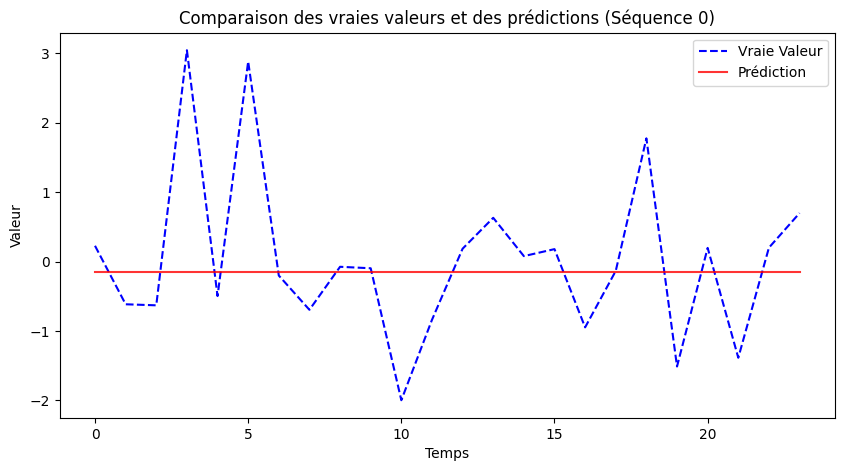

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Sélectionner un exemple de série temporelle (par exemple, la première séquence testée)
index = 0  # Tu peux changer cet index pour voir d'autres séquences
true_series = true_values[index, :, 0]  # Première variable (colonne 0)
pred_series = predictions[index, :, 0]  # Première variable (colonne 0)

# Affichage
plt.figure(figsize=(10, 5))
plt.plot(true_series, label="Vraie Valeur", linestyle="dashed", color="blue")
plt.plot(pred_series, label="Prédiction", color="red", alpha=0.8)
plt.legend()
plt.title(f"Comparaison des vraies valeurs et des prédictions (Séquence {index})")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show()


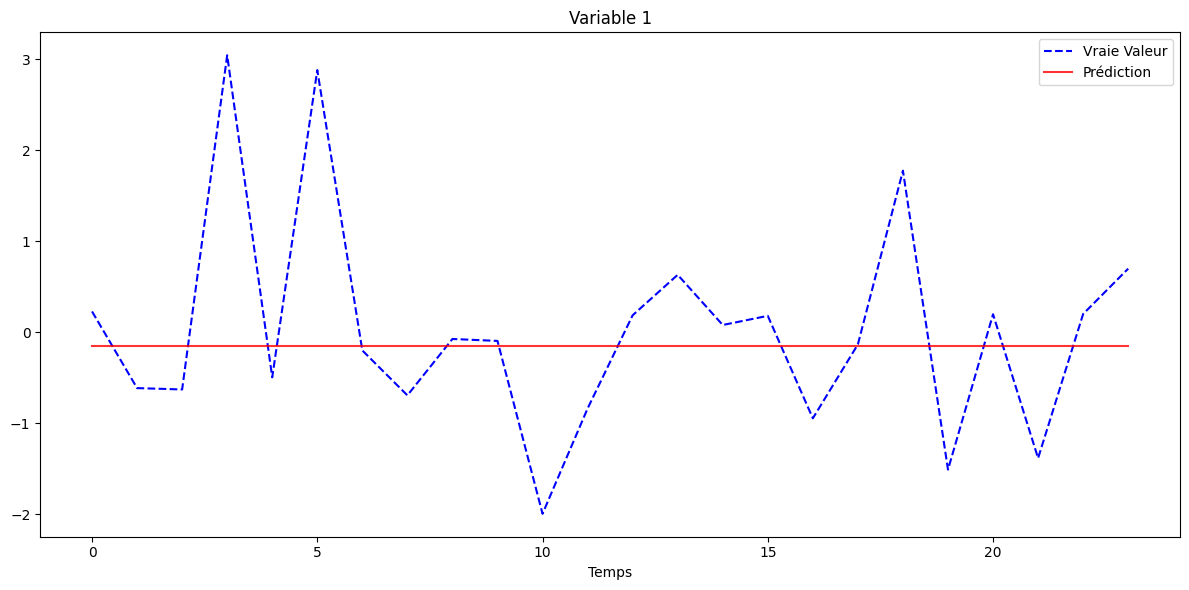

In [19]:
num_vars = 1  # Nombre de variables à afficher

plt.figure(figsize=(12, 6))
for i in range(num_vars):
    plt.subplot(num_vars, 1, i + 1)
    plt.plot(true_values[index, :, i], label="Vraie Valeur", linestyle="dashed", color="blue")
    plt.plot(predictions[index, :, i], label="Prédiction", color="red", alpha=0.8)
    plt.legend()
    plt.title(f"Variable {i+1}")

plt.xlabel("Temps")
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
data = pd.read_csv("./dataset/exchange_rate/exchange_rate.csv")
data2 = pd.read_csv("./dataset/stock_var/stock.csv")
print(data.dtypes)
print(data2.dtypes)

date     object
0       float64
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
OT      float64
dtype: object
date      object
AAPL     float64
GOOGL    float64
OT       float64
dtype: object
